In [ ]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import all relevant python packages 
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt 
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
# Read CSV train data file into DataFrame
inc_df = pd.read_csv('/content/drive/MyDrive/ML NIIT/SPRINT 3/DS2_C5_S3_Income_Data_Challenge.csv')
inc_df.head()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#Structure the data

In [ ]:
# shape of the dataset
print('The number of samples in data is {}.'.format(inc_df.shape[0]))

The number of samples in data is 32561.


In [ ]:
print(inc_df.shape)

(32561, 15)


In [ ]:
inc_df.describe()

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
inc_df_c=inc_df
columns=inc_df_c.columns
columns

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Education_Num',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       'Income_Bracket'],
      dtype='object')

#Task_2: Data Preparation and Visualization

### Missing Value Treatment

In [ ]:
missing_values=["!","@","#","$","%","^","&","*","(",")","-"," ?"]
inc_df_c.replace(missing_values,np.nan, inplace=True)

In [ ]:
inc_df_c.isnull().sum()


Age                  0
WorkClass         1836
Fnlwgt               0
Education            0
Education_Num        0
Marital_Status       0
Occupation        1843
Relationship         0
Race                 0
Gender               0
Capital_Gain         0
Capital_Loss         0
Hours_Per_Week       0
Native_Country     583
Income_Bracket       0
dtype: int64

In [ ]:
inc_df_c = inc_df_c.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
inc_df_c.isnull().sum()


Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [ ]:
# creating list of object datatype columns and converting non-numeric columns into categorical datatype column
obj=[]
for i in inc_df.select_dtypes('object').columns:
  obj.append(i)

for i in obj:
  inc_df[i]=inc_df[i].astype('category')


print(inc_df.dtypes)

Age                  int64
WorkClass         category
Fnlwgt               int64
Education         category
Education_Num        int64
Marital_Status    category
Occupation        category
Relationship      category
Race              category
Gender            category
Capital_Gain         int64
Capital_Loss         int64
Hours_Per_Week       int64
Native_Country    category
Income_Bracket    category
dtype: object


In [ ]:
# Using Label Encoder technique to convert categorical column into numerical type

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
inc_df_c['WorkClass']= label_encoder.fit_transform(inc_df_c['WorkClass'])
inc_df_c['Education']= label_encoder.fit_transform(inc_df_c['Education'])
inc_df_c['Marital_Status']= label_encoder.fit_transform(inc_df_c['Marital_Status'])
inc_df_c['Occupation']= label_encoder.fit_transform(inc_df_c['Occupation'])
inc_df_c['Gender']= label_encoder.fit_transform(inc_df_c['Gender'])
inc_df_c['Native_Country']= label_encoder.fit_transform(inc_df_c['Native_Country'])
inc_df_c['Income_Bracket']= label_encoder.fit_transform(inc_df_c['Income_Bracket'])
inc_df_c['Relationship']= label_encoder.fit_transform(inc_df_c['Relationship'])
inc_df_c['Race']= label_encoder.fit_transform(inc_df_c['Race'])


#Data Scaling

In [ ]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  new_income_df = inc_df_c.select_dtypes(include=numerics)
  if scale == 'minmax':
    scaler = MinMaxScaler()
  else:
    scaler = StandardScaler()
  df_scaled = pd.DataFrame(scaler.fit_transform(new_income_df.to_numpy()),columns=new_income_df.columns)
  return df_scaled

In [ ]:
# scaling the data using MinMax Scaling process
scale = 'minmax' #standard
inc_df_scaled1=feature_scale(scale)
inc_df_scaled1

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,0.301370,0.857143,0.044302,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.397959,0.95,0.0
1,0.452055,0.714286,0.048238,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.122449,0.95,0.0
2,0.287671,0.428571,0.138113,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.397959,0.95,0.0
3,0.493151,0.428571,0.151068,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.397959,0.95,0.0
4,0.150685,0.428571,0.221488,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.397959,0.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.428571,0.166404,0.466667,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.377551,0.95,0.0
32557,0.315068,0.428571,0.096500,0.733333,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.000000,0.0,0.397959,0.95,1.0
32558,0.561644,0.428571,0.094827,0.733333,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.397959,0.95,0.0
32559,0.068493,0.428571,0.128499,0.733333,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.193878,0.95,0.0


In [ ]:
# IDENTIFY CORRELATION AMONG VARIALES
corr=inc_df_scaled1.corr()
corr.style.background_gradient(cmap='coolwarm_r')

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
Age,1.000000,0.040504,-0.076646,-0.010508,0.036527,-0.266288,0.001739,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000270,0.234037
WorkClass,0.040504,1.000000,-0.024338,0.004874,0.003536,-0.020468,0.007110,-0.057947,0.048350,0.071584,0.031505,0.002644,0.042199,-0.001625,0.002693
Fnlwgt,-0.076646,-0.024338,1.000000,-0.028145,-0.043195,0.028153,0.000188,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.063286,-0.009463
Education,-0.010508,0.004874,-0.028145,1.000000,0.359153,-0.038407,-0.041279,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.076060,0.079317
Education_Num,0.036527,0.003536,-0.043195,0.359153,1.000000,-0.069304,0.070954,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.088894,0.335154
Marital_Status,-0.266288,-0.020468,0.028153,-0.038407,-0.069304,1.000000,0.034962,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.021278,-0.199307
Occupation,0.001739,0.007110,0.000188,-0.041279,0.070954,0.034962,1.000000,-0.037451,-0.004839,0.047461,0.018021,0.009680,-0.012879,-0.002217,0.034625
Relationship,-0.263698,-0.057947,0.008931,-0.010876,-0.094153,0.185451,-0.037451,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.010712,-0.250918
Race,0.028718,0.048350,-0.021291,0.014131,0.031838,-0.068013,-0.004839,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.116529,0.071846
Gender,0.088832,0.071584,0.026858,-0.027356,0.012280,-0.129314,0.047461,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,0.002061,0.215980


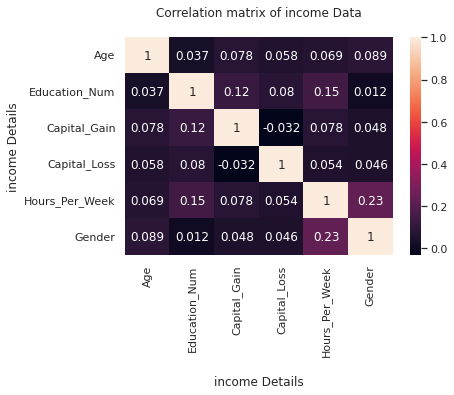

In [ ]:
new_df_scaled=inc_df_scaled1[['Age','Education_Num', 'Capital_Gain','Capital_Loss', 'Hours_Per_Week', 'Gender']]
hm = sns.heatmap(new_df_scaled.corr(), annot = True)
hm.set(xlabel='\nincome Details', ylabel='income Details', title = "Correlation matrix of income Data\n")
plt.show()

# Data Splitting

In [ ]:
# splitting dataframe by row index
income_df_c=inc_df
train_num=int(32561*0.8)
income_df_train = income_df_c.iloc[:train_num,:]
income_df_test = income_df_c.iloc[(train_num+1):,:]
print("Shape of new dataframes - {} , {}".format(income_df_train.shape, income_df_test.shape))

Shape of new dataframes - (26048, 15) , (6512, 15)


In [ ]:
# splitting dataframe using train_test_split() built in method
y = income_df_c['Income_Bracket']
X = income_df_c
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
print("Shape of new dataframes - {} , {}".format(X_train.shape, X_test.shape))

Shape of new dataframes - (26048, 15) , (6513, 15)


# Data Visualization

[' <=50K', ' >50K']
Categories (2, object): [' <=50K', ' >50K']


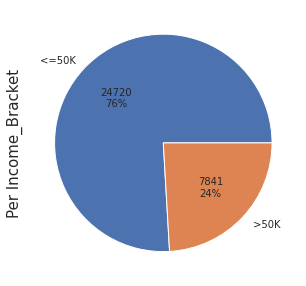

In [ ]:
labels=income_df_c['Income_Bracket'].unique()
print(labels)
def label_function(val):
    return f'{val / 100 * len(income_df_c):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))
#plt.pie(loan_df_c['purpose_encode'])
income_df_c.groupby(income_df_c['Income_Bracket']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('Per Income_Bracket', size=15)
# show plot
plt.show()

In this pi chart 76% of people having income less than or equals to 50k and 24% of people having more than salary of 50k.

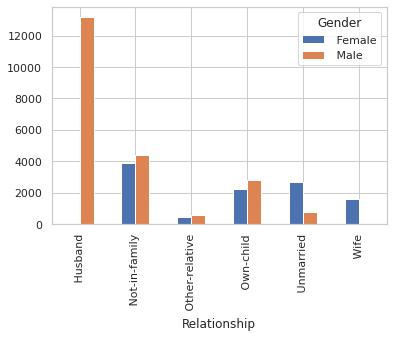

In [ ]:
pd.crosstab(inc_df['Relationship'],inc_df['Gender']).plot(kind='bar')

it is relationship and gender wise representation and husband having more count.

[' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', NaN, ' Self-emp-inc', ' Without-pay', ' Never-worked']
Categories (8, object): [' Federal-gov', ' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc',
                         ' Self-emp-not-inc', ' State-gov', ' Without-pay']


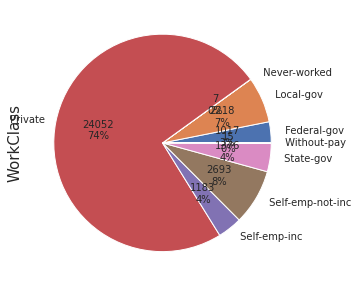

In [ ]:
labels=income_df_c['WorkClass'].unique()
print(labels)
def label_function(val):
    return f'{val / 100 * len(income_df_c):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))
#plt.pie(loan_df_c['purpose_encode'])
income_df_c.groupby(income_df_c['WorkClass']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('WorkClass', size=15)
# show plot
plt.show()

Private type of workclass is having more count which is 74% of whole data.

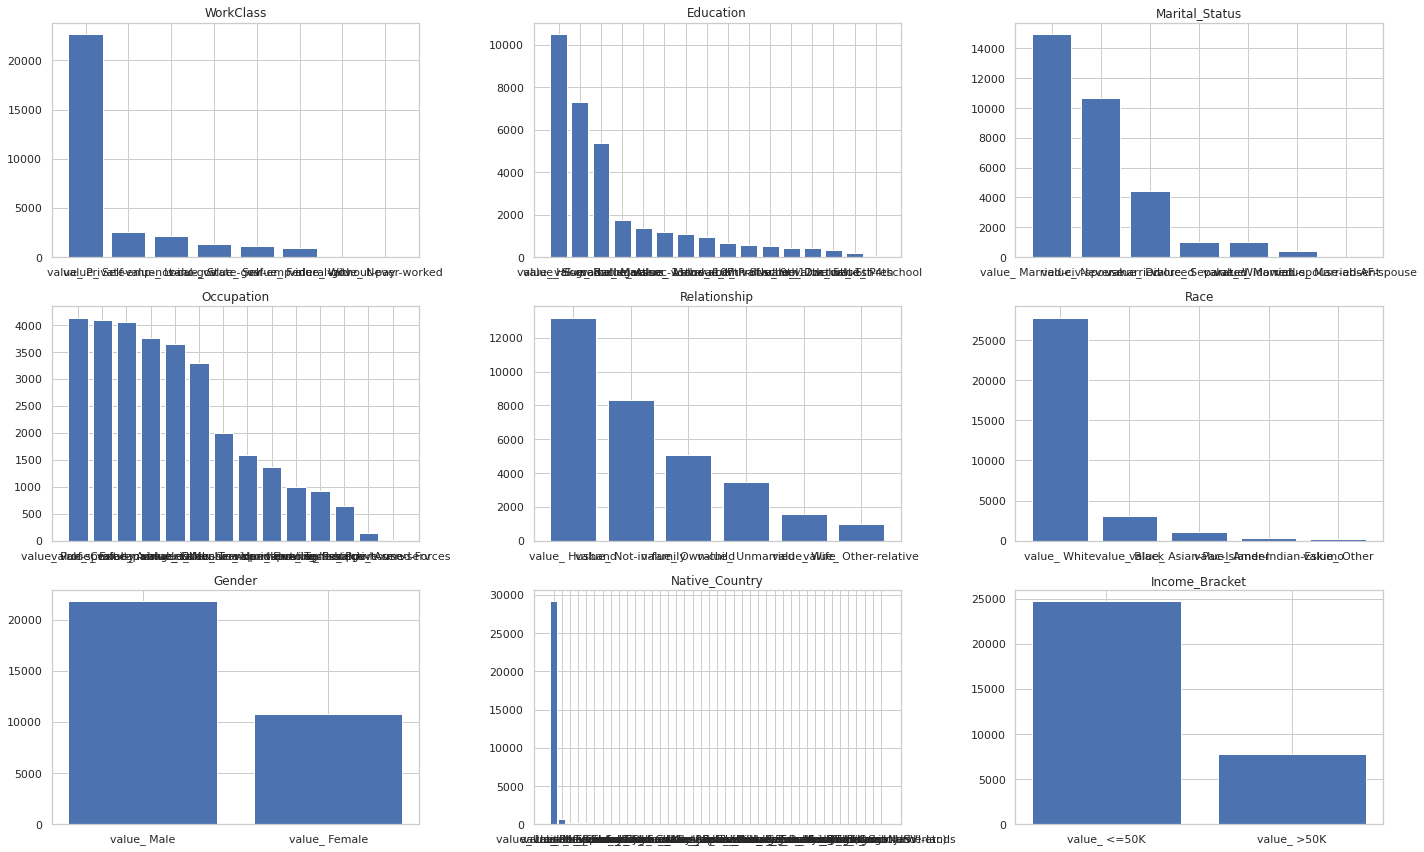

In [ ]:
num_cols = 3
cat_income_df = income_df_c.select_dtypes('category')
categorical_cols=cat_income_df.columns
num_rows= int(len(categorical_cols)/num_cols)
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,12))
for col, ax in zip(categorical_cols,axs.flatten()[:len(categorical_cols)]):
    stats = cat_income_df[col].value_counts()
    values = list(stats)
    names = list(map(lambda x : ''.join(('value_',str(x))),list(stats.index)))
    ax.bar(names,values)
    ax.set_title(col)   
plt.show()

#Task_3: Train the model

### Preparation of training and test dataset

In [ ]:
column_correlation = inc_df.corr()
column_correlation

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
Education_Num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
Capital_Gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
Capital_Loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
Hours_Per_Week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [ ]:
#Creating test and training datasets
inc_train, inc_test = train_test_split(inc_df_c,train_size = 0.8)

print('Size of training dataset: ', inc_train.shape)
print('Size of test dataset: ', inc_test.shape)

Size of training dataset:  (26048, 15)
Size of test dataset:  (6513, 15)


In [ ]:
X_train = inc_train.drop(columns='Income_Bracket', axis =1)
Y_train = inc_train['Income_Bracket']
X_test = inc_test.drop(columns='Income_Bracket', axis =1)
Y_test = inc_test['Income_Bracket']
X_train.shape, Y_train.shape, X_test.shape

((26048, 14), (26048,), (6513, 14))

In [ ]:
# Logistic Regression - training the model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# Using the trained model to predict the outcome of the X_Test dataset
Y_pred = logreg.predict(X_test)

#Calculating the accuracy of the training dataset
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.02

In [ ]:
# indicates the value of the slope of each parameter 
coeff_df = pd.DataFrame(inc_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
12,Native_Country,0.026537
4,Marital_Status,0.022326
0,WorkClass,0.010985
9,Capital_Gain,0.004481
11,Hours_Per_Week,0.000745
10,Capital_Loss,0.000369
2,Education,-0.000002
8,Gender,-0.007567
3,Education_Num,-0.010303
6,Relationship,-0.010460


In [ ]:
#model.intercept_ indicates the intercept with the Y-axis
logreg.intercept_

array([-0.00343302])

In [ ]:
# evalate the model on the test data
logreg.score(X_test, Y_test)

0.7950253339474896

#Task_4: Model Evaluation

### Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test,Y_pred))

tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
print(tn, fp, fn, tp)

[[4702  282]
 [1053  476]]
4702 282 1053 476


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('accuracy:', accuracy_score(Y_test, Y_pred))
print('recall:', recall_score(Y_test, Y_pred))
print('f1-score:', f1_score(Y_test, Y_pred))
print('precision:', precision_score(Y_test, Y_pred))

accuracy: 0.7950253339474896
recall: 0.31131458469587964
f1-score: 0.4162658504591168
precision: 0.6279683377308707


In [ ]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(Y_test, logreg.predict_proba(X_test)[:,1])
roc

0.7582355099431326

In [ ]:
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
# calculate AUC
auc = roc_auc_score(Y_test, Y_pred)
print('AUC: %.3f' % auc)

AUC: 0.627


In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [ ]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]

In [ ]:
# predict probabilities
lr_probs = logreg.predict_proba(X_test)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.758


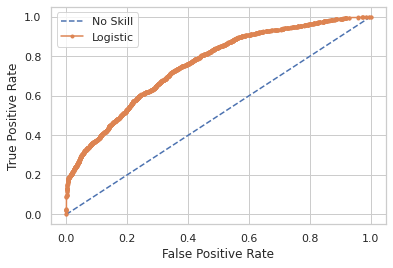

In [ ]:
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

SINCE THE CURVE IS NIETHER TOO CLOSE NOR TOO AWAY FROM "NO DIFFERENCE LINE(BLUE LINE)", THE MODEL IS MODERATE(NEITHER GOOD NOR BAD)